Name Surname: Emil Huseynov

Student No: 150210906

---

Libraries to be used

---

In [13]:
from sklearn.linear_model import LogisticRegression as SklearnLogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#### Logistic Regression (35 points)

Logistic Regression with MSE Loss (5 points)

In [49]:
class LogisticRegressionMSE:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Compute accuracy of train and test data every 100 iterations during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []
        self.loss_history = []  # Added to store MSE loss

    def sigmoid(self, z):
        # Sigmoid activation function
        return 1 / (1 + np.exp(-z))

    def fit(self):
        n_samples = self.train_data.shape[0]

        for i in range(1, self.iterations + 1):
            # Forward pass
            z = np.dot(self.train_data, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute MSE Loss
            mse_loss = (1 / (2 * n_samples)) * np.sum((self.train_label - y_pred) ** 2)
            self.loss_history.append(mse_loss)

            # Compute the gradient for MSE loss:
            # First, compute the component (y_pred - y)
            diff = (y_pred - self.train_label)

            # Now incorporate the derivative of sigmoid: y_pred*(1 - y_pred)
            diff = diff * y_pred * (1 - y_pred)  # element-wise multiplication

            # Gradient for weights and bias
            dw = (1 / n_samples) * np.dot(self.train_data.T, diff)
            db = (1 / n_samples) * np.sum(diff)

            # Update weights and bias
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Every 100 iterations, record training and testing accuracy
            if i % 100 == 0:
                train_acc = self._compute_accuracy(self.train_data, self.train_label)
                test_acc = self._compute_accuracy(self.test_data, self.test_label)
                self.accuracy_train_data_during_training.append(train_acc)
                self.accuracy_test_data_during_training.append(test_acc)

                print(f"MSE Iteration {i}/{self.iterations} - MSE Loss: {mse_loss:.4f} - "
                      f"Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    def predict(self, data):
        z = np.dot(data, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        # Convert to binary predictions
        return np.where(y_pred >= 0.5, 1, 0)

    def _compute_accuracy(self, data, labels):
        predictions = self.predict(data)
        return np.mean(predictions == labels) * 100.0

Logistic Regression with Cross Entropy Loss (5 points)

In [51]:
class LogisticRegressionCrossEntropy:
    def __init__(self, train_data, train_label, test_data, test_label, learning_rate=0.005, iterations=5000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.train_data = train_data
        self.train_label = train_label
        self.test_data = test_data
        self.test_label = test_label

        n_samples, n_features = self.train_data.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0

        # Lists to store accuracy at intervals during training
        self.accuracy_train_data_during_training = []
        self.accuracy_test_data_during_training = []
        self.loss_history = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def fit(self):
        """
        Trains the Logistic Regression model using Gradient Descent
        with Cross-Entropy Loss.
        """
        n_samples = self.train_data.shape[0]

        for i in range(1, self.iterations + 1):
            # Forward pass: compute linear combination and apply sigmoid
            z = np.dot(self.train_data, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute Cross-Entropy Loss
            # To avoid log(0), add a small epsilon inside the log
            epsilon = 1e-15
            y_pred_clipped = np.clip(y_pred, epsilon, 1 - epsilon)
            loss = - (1 / n_samples) * np.sum(
                self.train_label * np.log(y_pred_clipped) +
                (1 - self.train_label) * np.log(1 - y_pred_clipped)
            )
            self.loss_history.append(loss)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(self.train_data.T, (y_pred - self.train_label))
            db = (1 / n_samples) * np.sum(y_pred - self.train_label)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Log accuracies every 100 iterations
            if i % 100 == 0:
                train_acc = self._compute_accuracy(self.train_data, self.train_label)
                test_acc = self._compute_accuracy(self.test_data, self.test_label)
                self.accuracy_train_data_during_training.append(train_acc)
                self.accuracy_test_data_during_training.append(test_acc)

                # Optional: Print progress
                print(f"CE Iteration {i}/{self.iterations} - Loss: {loss:.4f} - "
                      f"Train Acc: {train_acc:.2f}% - Test Acc: {test_acc:.2f}%")

    def predict(self, data):
        z = np.dot(data, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        # Convert probabilities to binary predictions
        return np.where(y_pred >= 0.5, 1, 0)

    def _compute_accuracy(self, data, labels):
        predictions = self.predict(data)
        accuracy = np.mean(predictions == labels) * 100.0
        return accuracy


Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


Training LogisticRegressionMSE:
MSE Iteration 100/5000 - MSE Loss: 0.0919 - Train Acc: 75.75% - Test Acc: 74.50%
MSE Iteration 200/5000 - MSE Loss: 0.0824 - Train Acc: 77.50% - Test Acc: 80.00%
MSE Iteration 300/5000 - MSE Loss: 0.0774 - Train Acc: 78.62% - Test Acc: 81.00%
MSE Iteration 400/5000 - MSE Loss: 0.0743 - Train Acc: 79.38% - Test Acc: 81.50%
MSE Iteration 500/5000 - MSE Loss: 0.0722 - Train Acc: 79.75% - Test Acc: 81.00%
MSE Iteration 600/5000 - MSE Loss: 0.0707 - Train Acc: 80.38% - Test Acc: 81.50%
MSE Iteration 700/5000 - MSE Loss: 0.0696 - Train Acc: 80.12% - Test Acc: 81.50%
MSE Iteration 800/5000 - MSE Loss: 0.0688 - Train Acc: 80.50% - Test Acc: 81.00%
MSE Iteration 900/5000 - MSE Loss: 0.0681 - Train Acc: 80.88% - Test Acc: 81.50%
MSE Iteration 1000/5000 - MSE Loss: 0.0675 - Train Acc: 80.50% - Test Acc: 81.50%
MSE Iteration 1100/5000 - MSE Loss: 0.0671 - Train Acc: 80.75% - Test Acc: 81.50%
MSE Iteration 1200/5000 - MSE Loss: 0.0667 - Train Acc: 80.62% - Test Acc: 

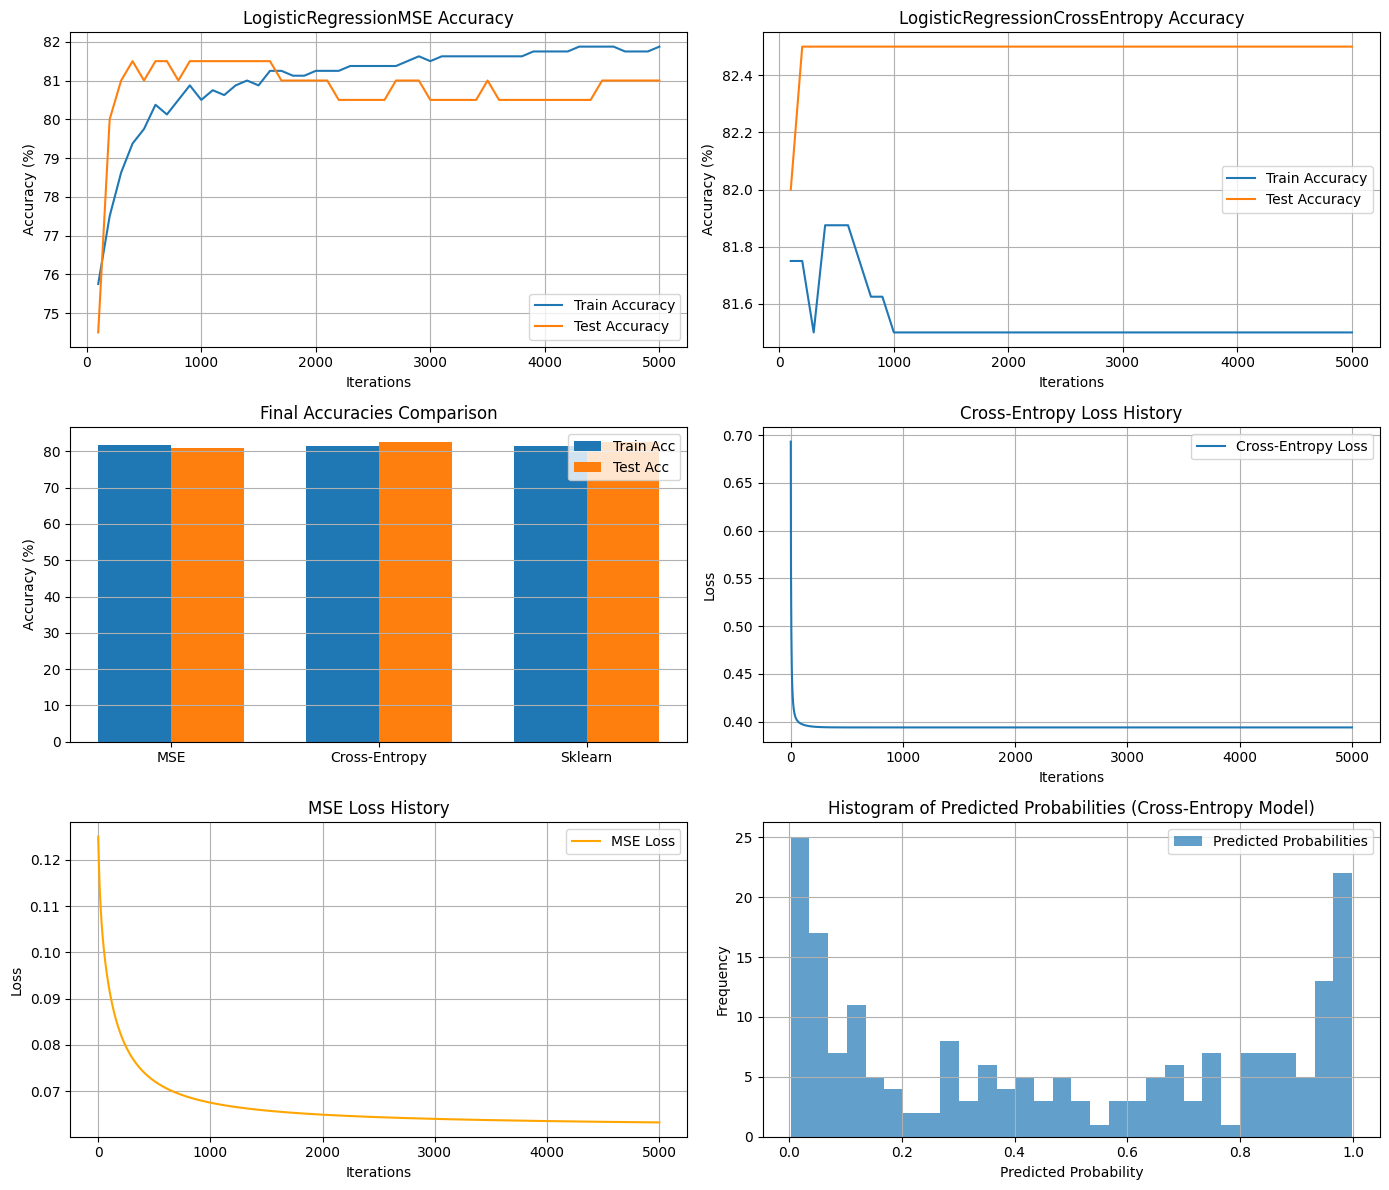

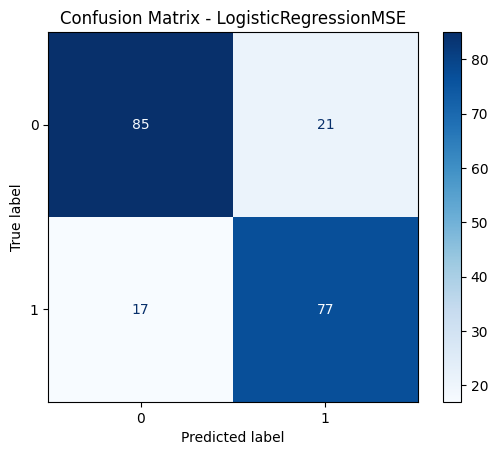

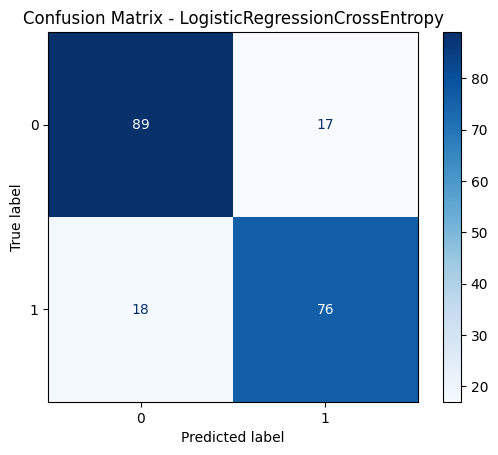

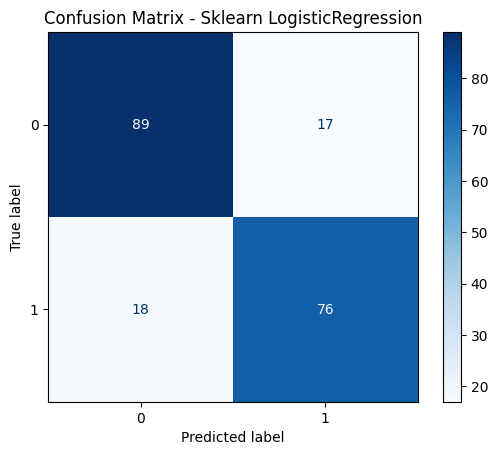

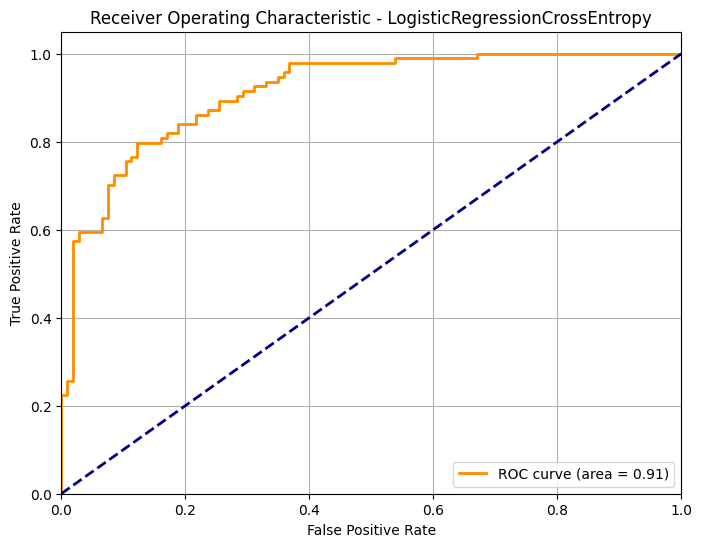

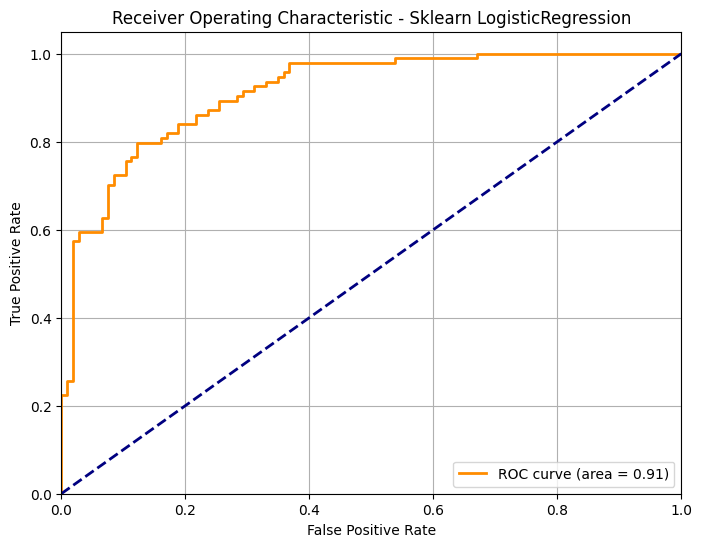

In [56]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
def validate_logistic_regression():
    # 1. Generate Synthetic Binary Classification Data
    X, y = make_classification(n_samples=1000, n_features=20,
                               n_informative=15, n_redundant=5,
                               random_state=42)

    # 2. Split into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42)

    # 3. Initialize and Train LogisticRegressionMSE
    mse_lr = LogisticRegressionMSE(
        train_data=X_train,
        train_label=y_train,
        test_data=X_test,
        test_label=y_test,
        learning_rate=0.01,
        iterations=5000
    )
    print("Training LogisticRegressionMSE:")
    mse_lr.fit()

    # 4. Initialize and Train LogisticRegressionCrossEntropy
    ce_lr = LogisticRegressionCrossEntropy(
        train_data=X_train,
        train_label=y_train,
        test_data=X_test,
        test_label=y_test,
        learning_rate=0.1,
        iterations=5000
    )
    print("\nTraining LogisticRegressionCrossEntropy:")
    ce_lr.fit()

    # 5. Initialize and Train scikit-learn's Logistic Regression Model
    sklearn_lr = SklearnLogisticRegression(
        penalty= None,  # Correctly specify no regularization
        solver='lbfgs',  # Suitable for small datasets
        max_iter=5000,
        random_state=42
    )
    sklearn_lr.fit(X_train, y_train)

    # 6. Make Predictions and Compute Accuracies
    # MSE Model
    mse_train_pred = mse_lr.predict(X_train)
    mse_test_pred = mse_lr.predict(X_test)
    mse_train_acc = accuracy_score(y_train, mse_train_pred) * 100
    mse_test_acc = accuracy_score(y_test, mse_test_pred) * 100

    # Cross-Entropy Model
    ce_train_pred = ce_lr.predict(X_train)
    ce_test_pred = ce_lr.predict(X_test)
    ce_train_acc = accuracy_score(y_train, ce_train_pred) * 100
    ce_test_acc = accuracy_score(y_test, ce_test_pred) * 100

    # Sklearn Model
    sklearn_train_pred = sklearn_lr.predict(X_train)
    sklearn_test_pred = sklearn_lr.predict(X_test)
    sklearn_train_acc = accuracy_score(y_train, sklearn_train_pred) * 100
    sklearn_test_acc = accuracy_score(y_test, sklearn_test_pred) * 100

    # 7. Print Accuracy Comparison
    print("\n=== Accuracy Comparison ===")
    print(f"LogisticRegressionMSE - Training Accuracy: {mse_train_acc:.2f}%")
    print(f"LogisticRegressionMSE - Testing Accuracy: {mse_test_acc:.2f}%")
    print(f"LogisticRegressionCrossEntropy - Training Accuracy: {ce_train_acc:.2f}%")
    print(f"LogisticRegressionCrossEntropy - Testing Accuracy: {ce_test_acc:.2f}%")
    print(f"Sklearn LogisticRegression - Training Accuracy: {sklearn_train_acc:.2f}%")
    print(f"Sklearn LogisticRegression - Testing Accuracy: {sklearn_test_acc:.2f}%")

    # 8. Plot Accuracies for Both Models
    iterations_mse = np.arange(100, mse_lr.iterations + 1, 100)
    iterations_ce = np.arange(100, ce_lr.iterations + 1, 100)

    plt.figure(figsize=(14, 12))

    # a. Plot for MSE Accuracy
    plt.subplot(3, 2, 1)
    plt.plot(iterations_mse, mse_lr.accuracy_train_data_during_training, label='Train Accuracy')
    plt.plot(iterations_mse, mse_lr.accuracy_test_data_during_training, label='Test Accuracy')
    plt.title('LogisticRegressionMSE Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # b. Plot for Cross-Entropy Accuracy
    plt.subplot(3, 2, 2)
    plt.plot(iterations_ce, ce_lr.accuracy_train_data_during_training, label='Train Accuracy')
    plt.plot(iterations_ce, ce_lr.accuracy_test_data_during_training, label='Test Accuracy')
    plt.title('LogisticRegressionCrossEntropy Accuracy')
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    # c. Plot Comparison of Final Accuracies
    models = ['MSE', 'Cross-Entropy', 'Sklearn']
    train_accuracies = [mse_train_acc, ce_train_acc, sklearn_train_acc]
    test_accuracies = [mse_test_acc, ce_test_acc, sklearn_test_acc]

    plt.subplot(3, 2, 3)
    x = np.arange(len(models))
    width = 0.35
    plt.bar(x - width/2, train_accuracies, width, label='Train Acc')
    plt.bar(x + width/2, test_accuracies, width, label='Test Acc')
    plt.ylabel('Accuracy (%)')
    plt.title('Final Accuracies Comparison')
    plt.xticks(x, models)
    plt.legend()
    plt.grid(axis='y')

    # d. Plot Loss History for Cross-Entropy
    plt.subplot(3, 2, 4)
    plt.plot(range(1, ce_lr.iterations +1), ce_lr.loss_history, label='Cross-Entropy Loss')
    plt.title('Cross-Entropy Loss History')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # e. Plot Loss History for MSE
    plt.subplot(3, 2, 5)
    plt.plot(range(1, mse_lr.iterations +1), mse_lr.loss_history, label='MSE Loss', color='orange')
    plt.title('MSE Loss History')
    plt.xlabel('Iterations')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    # f. Histogram of Predicted Probabilities for Cross-Entropy Model
    y_pred_prob_ce = ce_lr.sigmoid(np.dot(X_test, ce_lr.weights) + ce_lr.bias)
    plt.subplot(3, 2, 6)
    plt.hist(y_pred_prob_ce, bins=30, alpha=0.7, label='Predicted Probabilities')
    plt.title('Histogram of Predicted Probabilities (Cross-Entropy Model)')
    plt.xlabel('Predicted Probability')
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    # 9. Additional Visualizations

    # a. Confusion Matrix for All Models
    def plot_confusion_matrix_custom(y_true, y_pred, model_name):
        cm = confusion_matrix(y_true, y_pred)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm)
        disp.plot(cmap=plt.cm.Blues)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()

    plot_confusion_matrix_custom(y_test, mse_test_pred, 'LogisticRegressionMSE')
    plot_confusion_matrix_custom(y_test, ce_test_pred, 'LogisticRegressionCrossEntropy')
    plot_confusion_matrix_custom(y_test, sklearn_test_pred, 'Sklearn LogisticRegression')

    # b. ROC Curve for Cross-Entropy Model
    def plot_roc_curve_custom(y_true, y_scores, model_name):
        fpr, tpr, thresholds = roc_curve(y_true, y_scores)
        roc_auc = auc(fpr, tpr)
        plt.figure(figsize=(8,6))
        plt.plot(fpr, tpr, color='darkorange',
                 lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Receiver Operating Characteristic - {model_name}')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    # For CE Model
    y_scores_ce = ce_lr.sigmoid(np.dot(X_test, ce_lr.weights) + ce_lr.bias)
    plot_roc_curve_custom(y_test, y_scores_ce, 'LogisticRegressionCrossEntropy')

    # For Sklearn Model
    y_scores_sklearn = sklearn_lr.predict_proba(X_test)[:,1]
    plot_roc_curve_custom(y_test, y_scores_sklearn, 'Sklearn LogisticRegression')

validate_logistic_regression();

#### Experiment

Dataset preparation

In [54]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use two Logistic Regression Methods on the dataset directly (10 points)
Show accuracy scores on test data

In [62]:

def validate_logistic_regression_on_titanic():
    # 1. Load the Titanic Dataset
    url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
    data = pd.read_csv(url)

    # 2. Data Preprocessing
    # Encode 'Sex' column: male=0, female=1
    data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

    # Select features and target
    X = data[['Pclass', 'Sex', 'SibSp', 'Parch', 'Fare']].values
    Y = data['Survived'].values

    # Handle missing values in 'Fare' if any
    if np.isnan(X).any():
        from sklearn.impute import SimpleImputer
        imputer = SimpleImputer(strategy='mean')
        X = imputer.fit_transform(X)

    # 3. Split into Training and Testing Sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, Y, test_size=0.3, random_state=42
    )

    # 4. Initialize and Train LogisticRegressionMSE
    mse_lr = LogisticRegressionMSE(
        train_data=X_train,
        train_label=y_train,
        test_data=X_test,
        test_label=y_test,
        learning_rate=0.01,
        iterations=5000
    )
    print("Training LogisticRegressionMSE:")
    mse_lr.fit()

    # 5. Initialize and Train LogisticRegressionCrossEntropy
    ce_lr = LogisticRegressionCrossEntropy(
        train_data=X_train,
        train_label=y_train,
        test_data=X_test,
        test_label=y_test,
        learning_rate=0.1,
        iterations=5000
    )
    print("\nTraining LogisticRegressionCrossEntropy:")
    ce_lr.fit()

    # 6. Make Predictions and Compute Accuracies
    # MSE Model
    mse_test_pred = mse_lr.predict(X_test)
    mse_test_acc = accuracy_score(y_test, mse_test_pred) * 100

    # Cross-Entropy Model
    ce_test_pred = ce_lr.predict(X_test)
    ce_test_acc = accuracy_score(y_test, ce_test_pred) * 100

    # 7. Print Accuracy Scores
    print("\n=== Accuracy Scores on Test Data ===")
    print(f"LogisticRegressionMSE - Test Accuracy: {mse_test_acc:.2f}%")
    print(f"LogisticRegressionCrossEntropy - Test Accuracy: {ce_test_acc:.2f}%")

# Run the validation function
if __name__ == "__main__":
    validate_logistic_regression_on_titanic()

Training LogisticRegressionMSE:
MSE Iteration 100/5000 - MSE Loss: 0.1140 - Train Acc: 68.22% - Test Acc: 67.91%
MSE Iteration 200/5000 - MSE Loss: 0.1088 - Train Acc: 68.70% - Test Acc: 68.28%
MSE Iteration 300/5000 - MSE Loss: 0.1059 - Train Acc: 68.54% - Test Acc: 68.28%
MSE Iteration 400/5000 - MSE Loss: 0.1042 - Train Acc: 68.70% - Test Acc: 68.28%
MSE Iteration 500/5000 - MSE Loss: 0.1030 - Train Acc: 69.34% - Test Acc: 69.03%
MSE Iteration 600/5000 - MSE Loss: 0.1021 - Train Acc: 69.34% - Test Acc: 69.03%
MSE Iteration 700/5000 - MSE Loss: 0.1013 - Train Acc: 69.34% - Test Acc: 69.03%
MSE Iteration 800/5000 - MSE Loss: 0.1007 - Train Acc: 69.34% - Test Acc: 69.40%
MSE Iteration 900/5000 - MSE Loss: 0.1001 - Train Acc: 69.34% - Test Acc: 69.40%
MSE Iteration 1000/5000 - MSE Loss: 0.0995 - Train Acc: 69.34% - Test Acc: 69.40%
MSE Iteration 1100/5000 - MSE Loss: 0.0989 - Train Acc: 69.50% - Test Acc: 69.40%
MSE Iteration 1200/5000 - MSE Loss: 0.0984 - Train Acc: 69.66% - Test Acc: 

Plot the training and test accuracy across the learning iterations of gradient descent

In [65]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Training Accuracy')
plt.plot(mse_lr.accuracy_train_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(ce_lr.accuracy_train_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

NameError: name 'mse_lr' is not defined

In [ ]:
plt.xlabel('Iterations')
plt.ylabel('Percentage Correctly Classified')
plt.title('Test Accuracy')
plt.plot(model_mse.accuracy_test_data_during_training, 'r-.', label='Logistic (MSE)')
plt.plot(model_ce.accuracy_test_data_during_training, 'g-', label='Logistic (Cross-Entropy)')
plt.legend(loc='best')

Explain the differences between MSE and Cross Entropy Loss in logistic regression, why is one of the versions of Logistic Regression learning faster in terms of gradient descent iterations than the other? (5 points)

Answer:


Show the plots demonstrating the effects of the learning rate and the number of iterations parameters on the training process (hyperparameter tuning) (5 points)

In [ ]:
### fill here ###

#### Decision Tree (35 points)

Implement Decision Tree Method (5 points)

In [ ]:
class DecisionTree:
    def __init__(self, columns, depth=None):
        self.max_depth = depth
        self.columns = columns

    def fit(self, train_data, train_label):
        # implement here
        pass

    def predict(self, test_data):
        # implement here
        pass

    def print_tree(self):
        # Implement your print function for your decision tree using preorder traversal
        # Internal nodes should be printed as feature_name <= threshold value
        # Leaf nodes should be printed as Left/Right Leaf: label value
        # Add an extra tab (\t) for each depth level to better visualize the tree structure
        pass

Validate your implementation using libraries (5 points)

(you can generate synthetic data using numpy of import another toy dataset from sklearn)


In [ ]:
### fill here ###

#### Experiment

Dataset preparation

In [ ]:
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
data = pd.read_csv(url)
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

X = data[['Pclass', 'Sex', 'SibSp','Parch','Fare']].values
Y = data['Survived'].values
columns = data.columns

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Use Decision Tree Method on the dataset directly (10 points)
Show accuracy score on test data

In [ ]:
### fill here ###

Print the decision tree (5 points)

In [ ]:
model_dt.print_tree()

Show the impact of the max_depth hyperparameter on the accuracy score (hyperparameter tuning) (5 points)

In [ ]:
### fill here ###

In [ ]:
iris = load_iris()
X = iris['data']
Y = iris['target']
columns = iris['feature_names']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

Show your implementation on different dataset (5 points)

In [ ]:
### fill here ###